## 3. 常微分方程式の数値解法（オイラー法）

### 3.1. バネで固定された粒子のシミュレーション

確率過程のシミュレーションを考える前に，今回はひとまず通常の確率的ではない（＝決定論的）運動のシミュレーションを扱う．例題として$xy$２次元平面上で原点にバネで固定された質量$m$の粒子のシミュレーションをオイラー法を用いて行う．粒子はバネから受ける力の他に，速度に比例した抵抗力を受けるものとし，初期座標$\mathbf{R}(0)$，初期速度$\mathbf{V}(0)$は任意とする．

<img src="./damped oscillator.jpg" width="400">

### 3.2. 運動方程式

\begin{equation}
\frac{d\mathbf{R}(t)}{dt}=\mathbf{V}(t) \tag{1}
\end{equation}
\begin{equation}
m\frac{d\mathbf{V}(t)}{dt}=-\zeta\mathbf{V}(t)-k\mathbf{R}(t) \tag{2}
\end{equation}


### 3.3 オイラー法

運動方程式(1)(2)を初期時刻$t=0$から任意の時刻$t$まで積分し，粒子位置と速度の時間発展$\mathbf{R}(0),\mathbf{V}(0)\rightarrow\mathbf{R}(t),\mathbf{V}(t)$を求めたい．とりあえず形式的に$0\rightarrow t$で定積分を行うと次式が得られる．

\begin{equation}\mathbf{R}(t)=\mathbf{R}(0)+\int_0^t dt\mathbf{V}(t) \tag{3}\end{equation}
\begin{equation}\mathbf{V}(t)=\mathbf{V}(0)-\frac{\zeta}{m}\int_0^t dt\mathbf{V}(t)-\frac{k}{m}\int_0^t dt\mathbf{R}(t) \tag{4}\end{equation}

一般的にこの積分が出来るとは限らないので，ここでコンピュータが扱いやすいように時刻$t$を小さな間隔$\Delta t$で区切り，$t_i\equiv i\Delta t \ (i=0,1,2,...)$と離散化して考える．以後簡単のために，$\mathbf{R}(t_i)\equiv\mathbf{R}_i$，$\mathbf{V}(t_i)\equiv\mathbf{V}_i$と表記する．$\Delta t$を十分に小さく取れば，$t_i\rightarrow t_{i+1}$間では被積分関数がほぼ変化しないため，以下の様に積分を単純に積で置き換えることが正当化される．

\begin{equation}\mathbf{R}_{i+1}=\mathbf{R}_i+\int_{t_i}^{t_{i+1}} dt\mathbf{V}(t)\simeq\mathbf{R}_i+\mathbf{V}_i \Delta t \tag{5}\end{equation}
\begin{equation}\mathbf{V}_{i+1}=\mathbf{V}_i-\frac{\zeta}{m}\int_{t_i}^{t_{i+1}} dt\mathbf{V}(t)-\frac{k}{m}\int_{t_i}^{t_{i+1}} dt\mathbf{R}(t)\simeq\left(1-\frac{\zeta}{m}\Delta t\right)\mathbf{V}_i - \frac{k}{m} \mathbf{R}_i \Delta t \tag{6}\end{equation}

これをオイラー法と呼ぶ．この方法を用いれば，直接(3)(4)を積分する代わりに，$\mathbf{R}_0,\mathbf{V}_0\rightarrow\mathbf{R}_1,\mathbf{V}_1\rightarrow\mathbf{R}_2,\mathbf{V}_2\rightarrow \cdots$と逐次的に時間発展を求めることができる（＝コンピュータシミュレーション）．

オイラー法は，もとの運動方程式(1)(2)において，以下の様に微分を前進差分で近似することと同じである．

\begin{equation}\frac{d\mathbf{R}(t)}{dt}\simeq \frac{\mathbf{R}_{i+1}-\mathbf{R}_{i}}{\Delta t}\tag{7}\end{equation}
\begin{equation}\frac{d\mathbf{V}(t)}{dt}\simeq \frac{\mathbf{V}_{i+1}-\mathbf{V}_{i}}{\Delta t} \tag{8}\end{equation}

### 3.4. オイラー法でシミュレーション

#### 使用するライブラリのインポート

In [1]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#### 変数の設定

In [2]:
dim  = 2                            # 系の次元
nums = 1000                         # シミュレーションのステップ数
R    = np.zeros(dim)                # 粒子の位置座標（瞬間値）
V    = np.zeros(dim)                # 粒子の速度（瞬間値）
Rs   = np.zeros([dim,nums])         # 粒子の位置座標（各ステップの値）
Vs   = np.zeros([dim,nums])         # 粒子の速度（各ステップの値）
Et   = np.zeros(nums)               # 系の全エネルギー（各ステップの値）
time = np.zeros(nums)               # 時刻（各ステップの値）

#### シミュレーションの実行と動画の表示

<IPython.core.display.Javascript object>


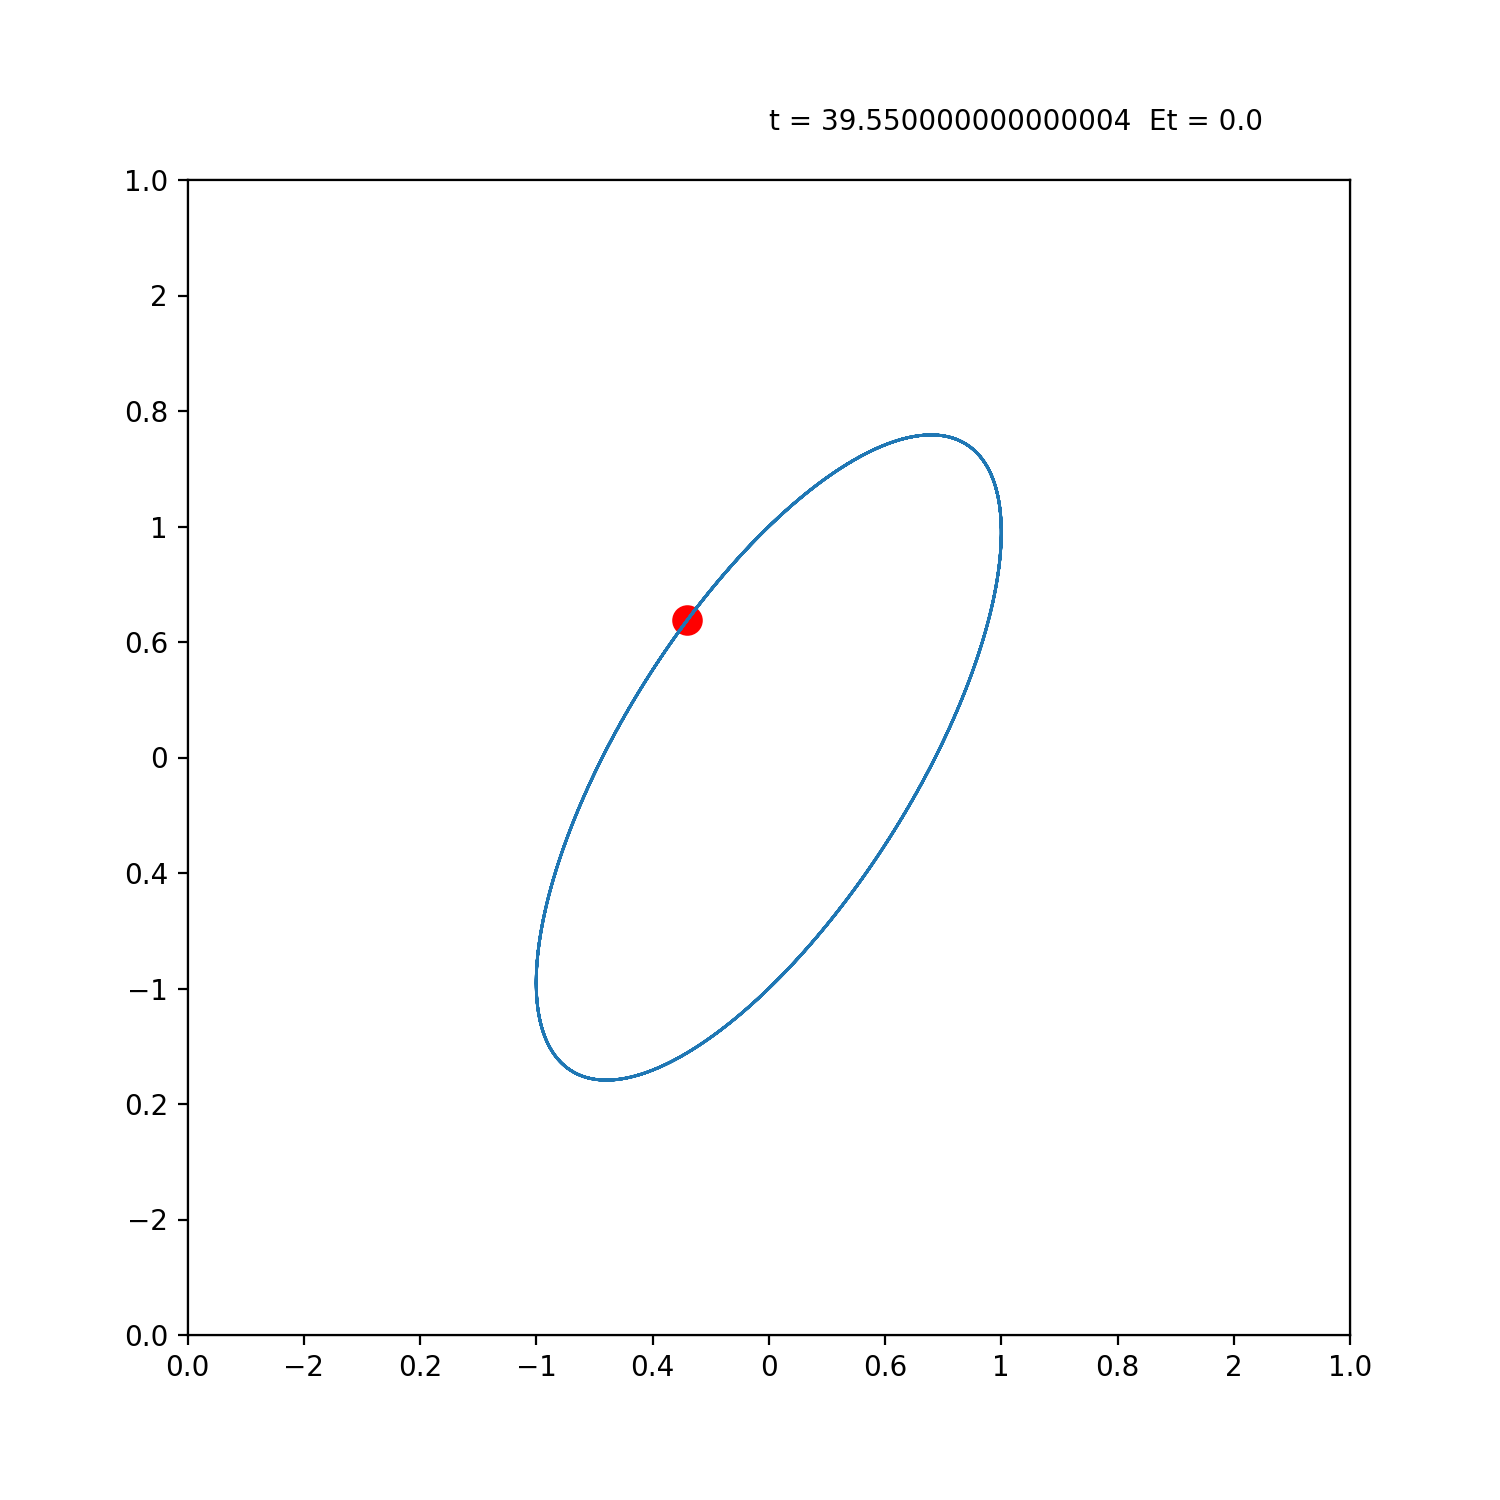

In [3]:
# System parameters
m    = 1.0                          # 粒子の質量
k    = 1.0                          # バネ定数
zeta = 0.0                          # 粒子の摩擦係数
# Initial condition
R[0] = 1.                           # 粒子位置の初期値(x座標)
R[1] = 1.                           # 粒子位置の初期値(y座標)
V[0] = 0.                           # 粒子速度の初期値(x座標)
V[1] = 1.                           # 粒子速度の初期値(y座標)
# set dt
dt   = 0.05*np.sqrt(k/m)            # dtの設定（バネの振動数の定数倍とする）
# set box size
box  = 5                            # 動画作成領域のサイズ
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax = plt.axes(xlim=(-box/2,box/2),ylim=(-box/2,box/2))
particles, = ax.plot([], [], 'ro', ms=10)
line, = ax.plot([], [], lw=1)
title = ax.text(0.5, 1.05,r'', transform = ax.transAxes, va='center')
xdata, ydata = [], []

def init():
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles,line,title

def animate(i):
    global R,V,F,Rs,Vs,time,Et
    V = V*(1-zeta/m*dt)-k/m*dt*R   # オイラー法で粒子速度の積分
#    V = V*(1-zeta/m*dt)-k/m*dt*np.linalg.norm(R)**2*R   # オイラー法で粒子速度の積分
    R = R + V*dt                    # オイラー法で粒子位置の積分
    xdata.append(R[0])
    ydata.append(R[1])
    particles.set_data(R[0], R[1])
    line.set_data(xdata, ydata)
    title.set_text(r"t = "+str(i*dt)+r"  Et = "+str(Et[i]))
    Rs[0:dim,i]=R                   # 粒子位置の瞬間値を保存
    Vs[0:dim,i]=V                   # 粒子速度の瞬間値を保存
    time[i]=i*dt                    # 時刻の瞬間値を保存
    Et[i]=0.5*m*np.linalg.norm(V)**2+0.5*k*np.linalg.norm(R)**2   # 系の全エネルギーの瞬間値を保存
#    Et[i]=0.5*m*np.linalg.norm(V)**2+0.25*k*np.linalg.norm(R)**4   # 系の全エネルギーの瞬間値を保存
    return particles,line,title

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nums, interval=5, blit=True, repeat=False)

- 線形バネ（$\mathbf{F}_{\rm spring}=-k\mathbf{R}$）のシミュレーションができたら，非線形バネ（$\mathbf{F}_{\rm spring}=-kR^2\mathbf{R}$）でも試してみよう．

#### シミュレーション結果のグラフ表示

- 保存された種々のデータ(A(t), B(t), ...)を時刻(t)の関数としてプロット

<IPython.core.display.Javascript object>


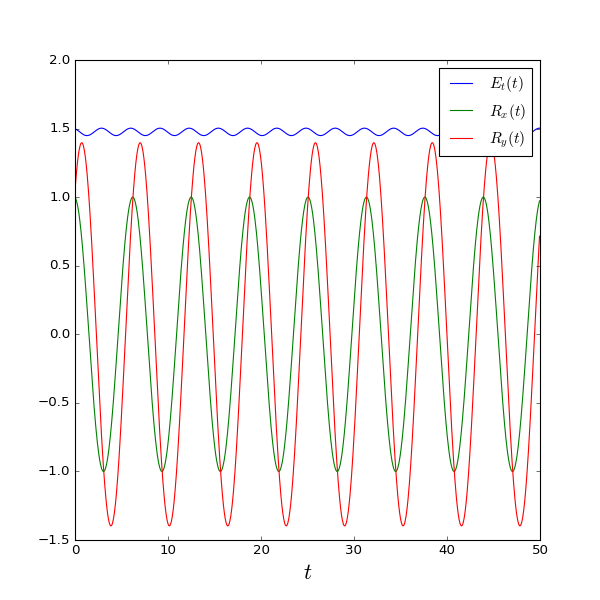

In [4]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time,Et)                # 各時刻の系の全エネルギーをプロット(摩擦がなければ一定，あれば減少するはず)
ax.plot(time,Rs[0])             # 各時刻の粒子位置(x座標)をプロット（動画で見たとおりに振動するはず）
ax.plot(time,Rs[1])             # 各時刻の粒子位置(y座標)をプロット（動画で見たとおりに振動するはず）
ax.legend([r'$E_t(t)$',r'$R_x(t)$',r'$R_y(t)$'], fontsize=14)
plt.show()

- A(t) vs B(t) のようなパラメトリックプロットも可能

<IPython.core.display.Javascript object>


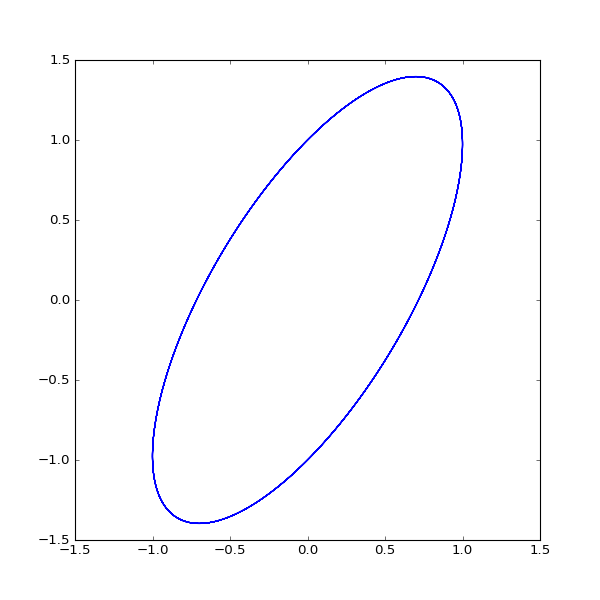

In [5]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.plot(Rs[0,0:nums],Rs[1,0:nums])                # 粒子の軌跡をパラメトリックプロット
plt.show()

### 宿題 #3

- シミュレーションの設定（粒子の初期条件，バネ定数，粒子質量，摩擦係数，バネの線形/非線形などなど）を変更して何度か実行し，目的のシミュレーションが実行できていることを確認する．その１つについて系の全エネルギーを時刻の関数としてプロットしたグラフをメールで提出すること．シミュレーションの設定条件もメールに明記すること．